# Import Library 

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

# Create House Table 

In [4]:
table_sql = """
            CREATE TABLE IF NOT EXISTS gp23.house
            (

                price integer,
                bed integer,
                bath integer,
                area integer,
                address VARCHAR(200),
                PRIMARY KEY(address)
            );

            """

In [5]:
conn.rollback()


In [6]:

cur.execute(table_sql)
conn.commit()

# Define the Table 

In [7]:

url = 'https://www.trulia.com/VA/Ashburn/20147/'

In [8]:
import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()
print(html_data.decode('utf-8'))

<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><script>
            window.__uspapi = function(command, version, callback) {
              try {
                if (command === 'getUSPData') {
                  var cookies = document.cookie.split(';');
                  for (var i = 0; i < cookies.length; i++) {
                    var cookie = cookies[i];
                    var separatorIndex = cookie.indexOf('=');
                    separatorIndex = separatorIndex < 0 ? cookie.length : separatorIndex;
                    var cookie_name = decodeURIComponent(cookie.slice(0, separatorIndex).replace(/^\s+/, ''));
                    if (cookie_name === 'usprivacy') {
                      var uspString = decodeURIComponent(cookie.slice(separatorIndex + 1));
                      callback({ version: version, uspString: uspString }, true);
                      return;
                    }
                  }
                }
              } catch (ex) {
                c

In [9]:

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')
print (soup)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><script>
            window.__uspapi = function(command, version, callback) {
              try {
                if (command === 'getUSPData') {
                  var cookies = document.cookie.split(';');
                  for (var i = 0; i < cookies.length; i++) {
                    var cookie = cookies[i];
                    var separatorIndex = cookie.indexOf('=');
                    separatorIndex = separatorIndex < 0 ? cookie.length : separatorIndex;
                    var cookie_name = decodeURIComponent(cookie.slice(0, separatorIndex).replace(/^\s+/, ''));
                    if (cookie_name === 'usprivacy') {
                      var uspString = decodeURIComponent(cookie.slice(separatorIndex + 1));
                      callback({ version: version, uspString: uspString }, true);
                      return;
                    }
                  }
                }
              } catch (ex) {
                

In [10]:
for li_class in soup.find_all('li', class_ = 'Grid__CellBox-sc-144isrp-0 SearchResultsList__WideCell-b7y9ki-2 jiZmPM'):
    try:
        for price_div in li_class.find_all('div',{'data-testid':'property-price'}):
            price =int(price_div.text.replace('$','').replace(",",""))
        for bed_div in li_class.find_all('div', {'data-testid':'property-beds'}):
            bed= int(bed_div.text.replace('bd','').replace(",",""))
        for bath_div in li_class.find_all('div',{'data-testid':'property-baths'}):
            bath =int(bath_div.text.replace('ba','').replace(",",""))
        for area_div in li_class.find_all('div',{'data-testid':'property-floorSpace'}):
            area=int(area_div.text.split('sqft')[0].replace(",",""))
        for address_div in li_class.find_all('div',{'data-testid':'property-address'}):
            address =address_div.text

        try:
            sql_insert = """
                        insert into gp23.house(price,bed,bath,area,address)
                        values('{}','{}','{}','{}','{}')            
                        """.format(price,bed,bath,area,address)

            cur.execute(sql_insert)
            conn.commit()
        except:
            conn.rollback()
    except:
        pass

# Query the Table

In [11]:
df = pandas.read_sql_query('select * from gp23.house ', conn)
df[:]

,price,bed,bath,area,address
0,984900,5,4,4563,"19952 Hazeltine Pl, Ashburn, VA 20147"
1,349900,2,2,1598,"43071 Old Gallivan Ter, Ashburn, VA 20147"
2,699000,4,4,2824,"20376 Charter Oak Dr, Ashburn, VA 20147"
3,691025,4,5,3555,"20445 Charter Oak Dr, Ashburn, VA 20147"
4,775000,4,4,3570,"20254 Ordinary Pl, Ashburn, VA 20147"
5,550000,3,3,2118,"44390 Oakmont Manor Sq, Ashburn, VA 20147"
6,860000,5,4,3711,"20879 Yellowbloom Ct, Ashburn, VA 20147"
7,337000,3,2,1284,"43840 Hickory Corner Ter #108, Ashburn, VA 20147"
8,568000,3,3,2348,"21610 Monmouth Ter, Ashburn, VA 20147"
9,630000,3,3,1800,"43308 Ardmore St, Ashburn, VA 20147"


# Basic Stat

In [12]:
df.describe()

,price,bed,bath,area
count,4.800000e+01,48.000000,48.000000,48.000000
mean,7.407752e+05,3.062500,3.145833,2435.687500
std,8.921726e+05,1.118629,1.129669,1364.388151
min,2.299000e+05,1.000000,1.000000,747.000000
25%,4.160000e+05,2.000000,2.000000,1442.250000
50%,5.999250e+05,3.000000,3.000000,2232.500000
75%,7.944200e+05,4.000000,4.000000,3051.500000
max,6.500000e+06,6.000000,6.000000,6624.000000


# Price Distribution 

<AxesSubplot:>

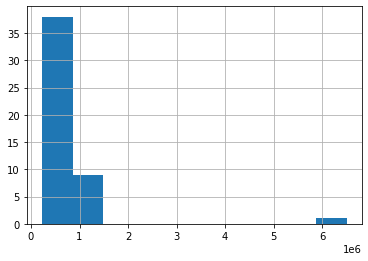

In [13]:
df['price'].hist()

# Bed vs Bath 

<AxesSubplot:xlabel='bed', ylabel='bath'>

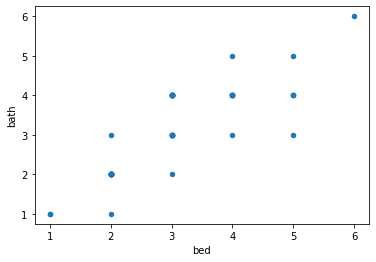

In [14]:
df.plot.scatter(x='bed',y='bath')